<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [7]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [8]:
seaborn.__version__

'0.9.0'

In [9]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [10]:
dataset = pandas.read_csv('D:\hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [11]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [12]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [11]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0



## 1. Estadísticos descriptivos


<h3> 1. Pantallazo de los datos, calculo del rango de las variables. </h3>


In [13]:
# armo dataset y variables que se van a necesitar
mi_dataset = dataset[important_cols]
num_cols = [col for col in mi_dataset.columns if 'pf_identity' in col]
num_cols += ['ef_score','ef_rank','hf_score', 'hf_rank']
mi_dataset[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


**Distribución de las variables numéricas.**

In [8]:
mi_dataset[num_cols].describe()

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


**Cálculo del rango de las variables numéricas a utilizar.**

El calculo del rango resulta de la diferencia entre el valor máximo vs el mínimo de la variable

In [14]:
rangos = [(i,min(mi_dataset[i]),max(mi_dataset[i]), max(mi_dataset[i]) - min(mi_dataset[i])) for i in dataset[num_cols]]

df = pandas.DataFrame(data=rangos, columns=['Variable','Mínimo','Máximo','Rango'])
display(df)

,Variable,Mínimo,Máximo,Rango
0,pf_identity_legal,0.000000,10.000000,10.000000
1,pf_identity_parental_marriage,0.000000,10.000000,10.000000
2,pf_identity_parental_divorce,0.000000,10.000000,10.000000
3,pf_identity_parental,0.000000,10.000000,10.000000
4,pf_identity_sex_male,0.000000,10.000000,10.000000
5,pf_identity_sex_female,0.000000,10.000000,10.000000
6,pf_identity_sex,0.000000,10.000000,10.000000
7,pf_identity_divorce,0.000000,10.000000,10.000000
8,pf_identity,0.000000,10.000000,10.000000
9,ef_score,2.880000,9.190000,6.310000


<h3> 2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?  </h3>


In [15]:
## división de dataset latinoamerica & el caribe VS resto del mundo
dataset_latino = mi_dataset[mi_dataset['region'] == 'Latin America & the Caribbean']
dataset_resto = mi_dataset[mi_dataset['region'] != 'Latin America & the Caribbean']


## variable pf_identity
media_latino = dataset_latino['pf_identity'].mean()
mediana_latino = dataset_latino['pf_identity'].median()
std_latino = dataset_latino['pf_identity'].std()

media_resto = dataset_resto['pf_identity'].mean()
mediana_resto = dataset_resto['pf_identity'].median()
std_resto = dataset_resto['pf_identity'].std()

print('\n' + '\033[1m' + 'Variable pf_identity' + '\033[0m' + '\n')

print('Media de Latinoamérica: ', media_latino)
print('Media de Resto del Mundo: ', media_resto)
print('Mediana de Latinoamérica: ', mediana_latino)
print('Mediana de Resto del Mundo: ', mediana_resto)
print('Desviación estandar de Latinoamérica: ', std_latino)
print('Desviación estandar de Resto del Mundo: ', std_resto)

## variable hf_score
media_latino = dataset_latino['hf_score'].mean()
mediana_latino = dataset_latino['hf_score'].median()
std_latino = dataset_latino['hf_score'].std()

media_resto = dataset_resto['hf_score'].mean()
mediana_resto = dataset_resto['hf_score'].median()
std_resto = dataset_resto['hf_score'].std()

print('\n' + '\033[1m' + 'Variable hf_score' + '\033[0m' + '\n')

print('Media de Latinoamérica: ', media_latino)
print('Media de Resto del Mundo: ', media_resto)
print('Mediana de Latinoamérica: ', mediana_latino)
print('Mediana de Resto del Mundo: ', mediana_resto)
print('Desviación estandar de Latinoamérica: ', std_latino)
print('Desviación estandar de Resto del Mundo: ', std_resto)



Variable pf_identity

Media de Latinoamérica:  8.765086206909483
Media de Resto del Mundo:  7.044502617793195
Mediana de Latinoamérica:  10.0
Mediana de Resto del Mundo:  8.333333332999999
Desviación estandar de Latinoamérica:  1.7117319741534658
Desviación estandar de Resto del Mundo:  3.3037709960911754

Variable hf_score

Media de Latinoamérica:  7.047981929952582
Media de Resto del Mundo:  6.982402868542753
Mediana de Latinoamérica:  7.02804474
Mediana de Resto del Mundo:  6.867190743
Desviación estandar de Latinoamérica:  0.6089040915687837
Desviación estandar de Resto del Mundo:  1.0908612143714618


*Moda* : para el caso de **pf_identity**, aunque dicha variable siendo numérica presenta rangos de valores limitados siendo su moda el valor 10.0 tanto para latinoamérica como para el resto del mundo, no así es el caso para la variable **hf_score** con naturaleza numérica dentro del rango de los números reales, careciendo de sentido la definición de moda.

In [16]:
print('Moda latinoamerica ', dataset_latino['pf_identity'].mode())
print('Moda Resto del mundo ', dataset_resto['pf_identity'].mode())


Moda latinoamerica  0    10.0
dtype: float64
Moda Resto del mundo  0    10.0
dtype: float64


<h3> 3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?  </h3>


Los valores de *pf_identity* y *hf_score* se correlacionan de cierta manera ya que el valor de pf_identity influye sobre la hf_score  en su cálculo; y ambos valores podrían compararse en el sentido que ambos van de la escala del 0 al 10. Pero así también el valor de *ef_score* también influye directamente a estos y debe ser tenido en cuenta.

<h3> 4. ¿Cómo pueden sanearse los valores faltantes?  </h3>


Para aquellos casos en donde no se cuenta con la completa información de un país, al momento de realizar los análisis estos registros no serán tenidos en cuenta utilizando la función dropna().

<h3> 5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?  </h3>


Text(0.5,1,'Boxplot de pf_identity')

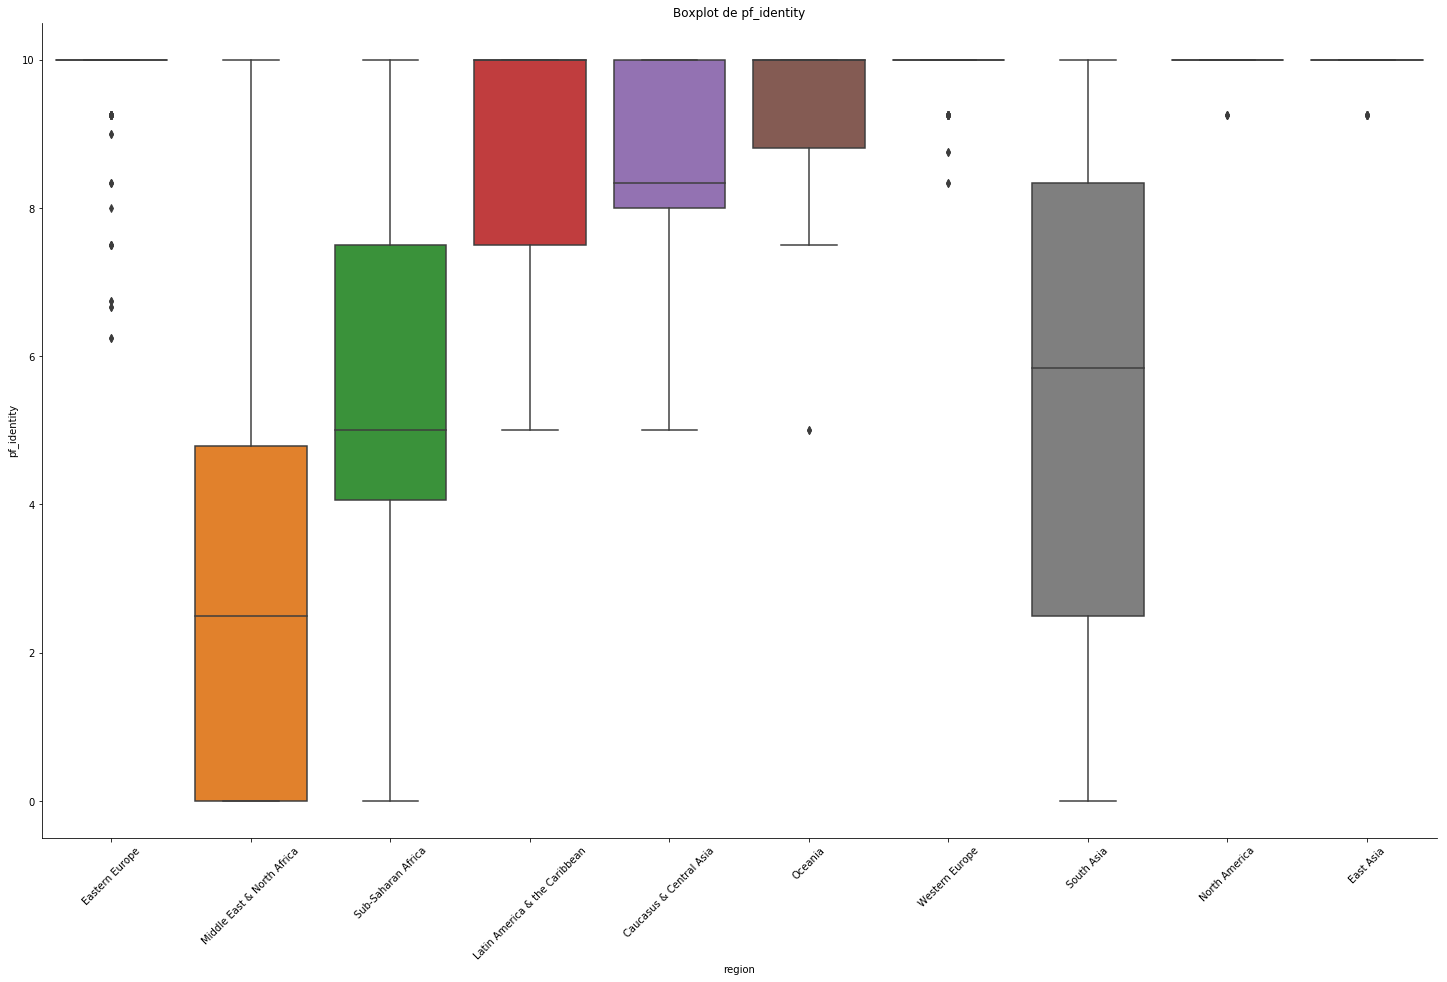

In [17]:
## detección de los outliers utilizando el gráfico de boxplot
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='pf_identity')
seaborn.despine()
plt.xticks(rotation=45)
plt.title('Boxplot de pf_identity')

Text(0.5,1,'Boxplot de hf_score')

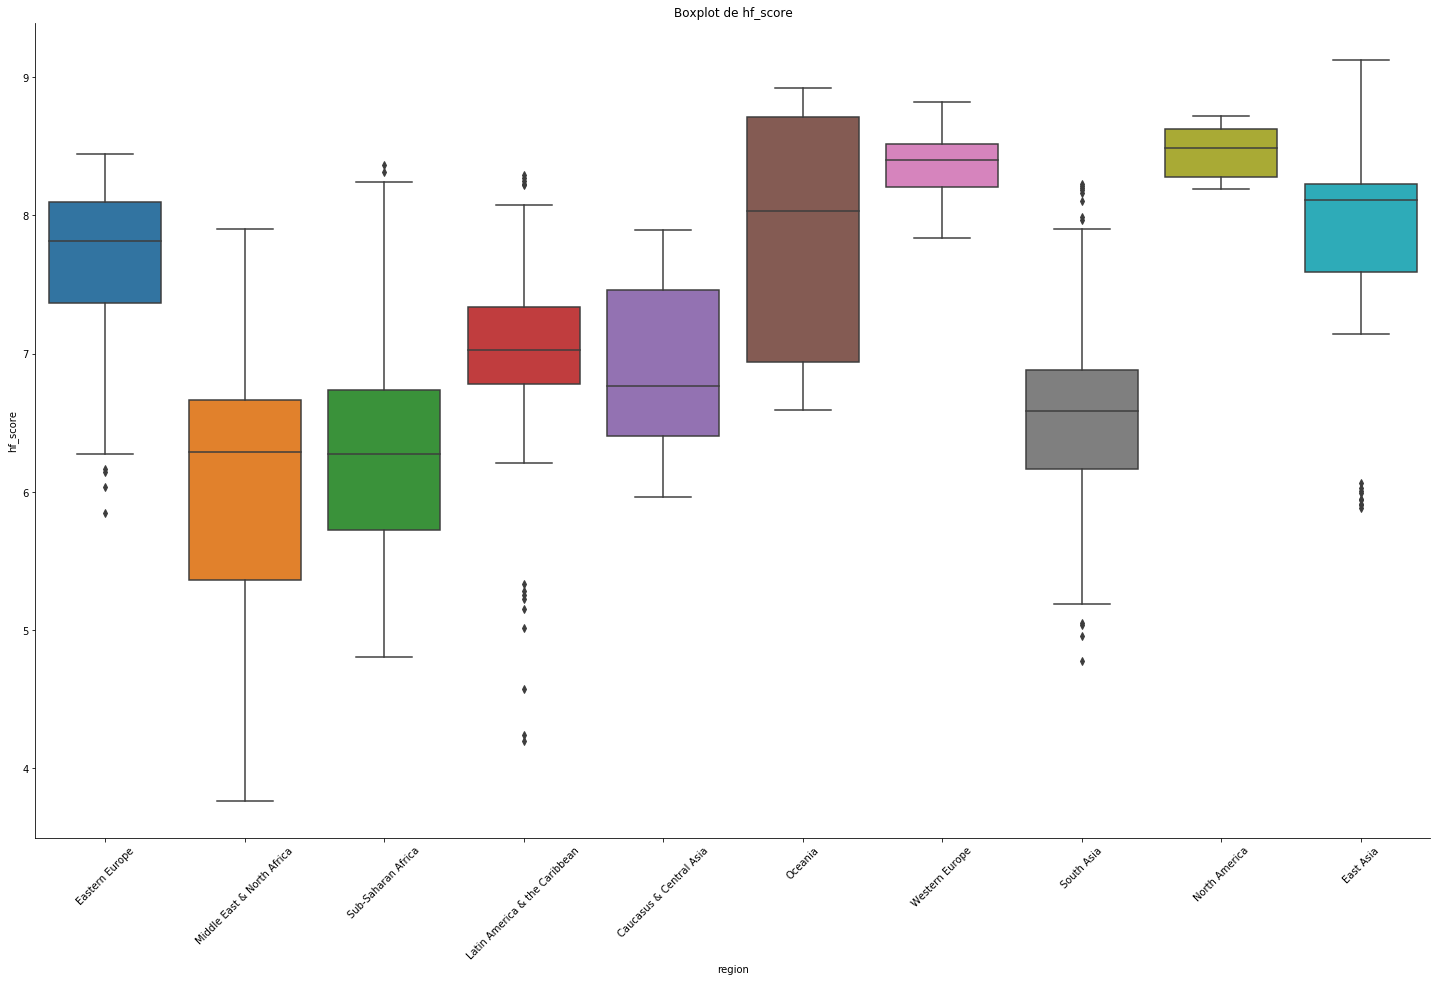

In [18]:
## detección de los outliers utilizando el gráfico de boxplot
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='hf_score')
seaborn.despine()
plt.xticks(rotation=45)
plt.title('Boxplot de hf_score')

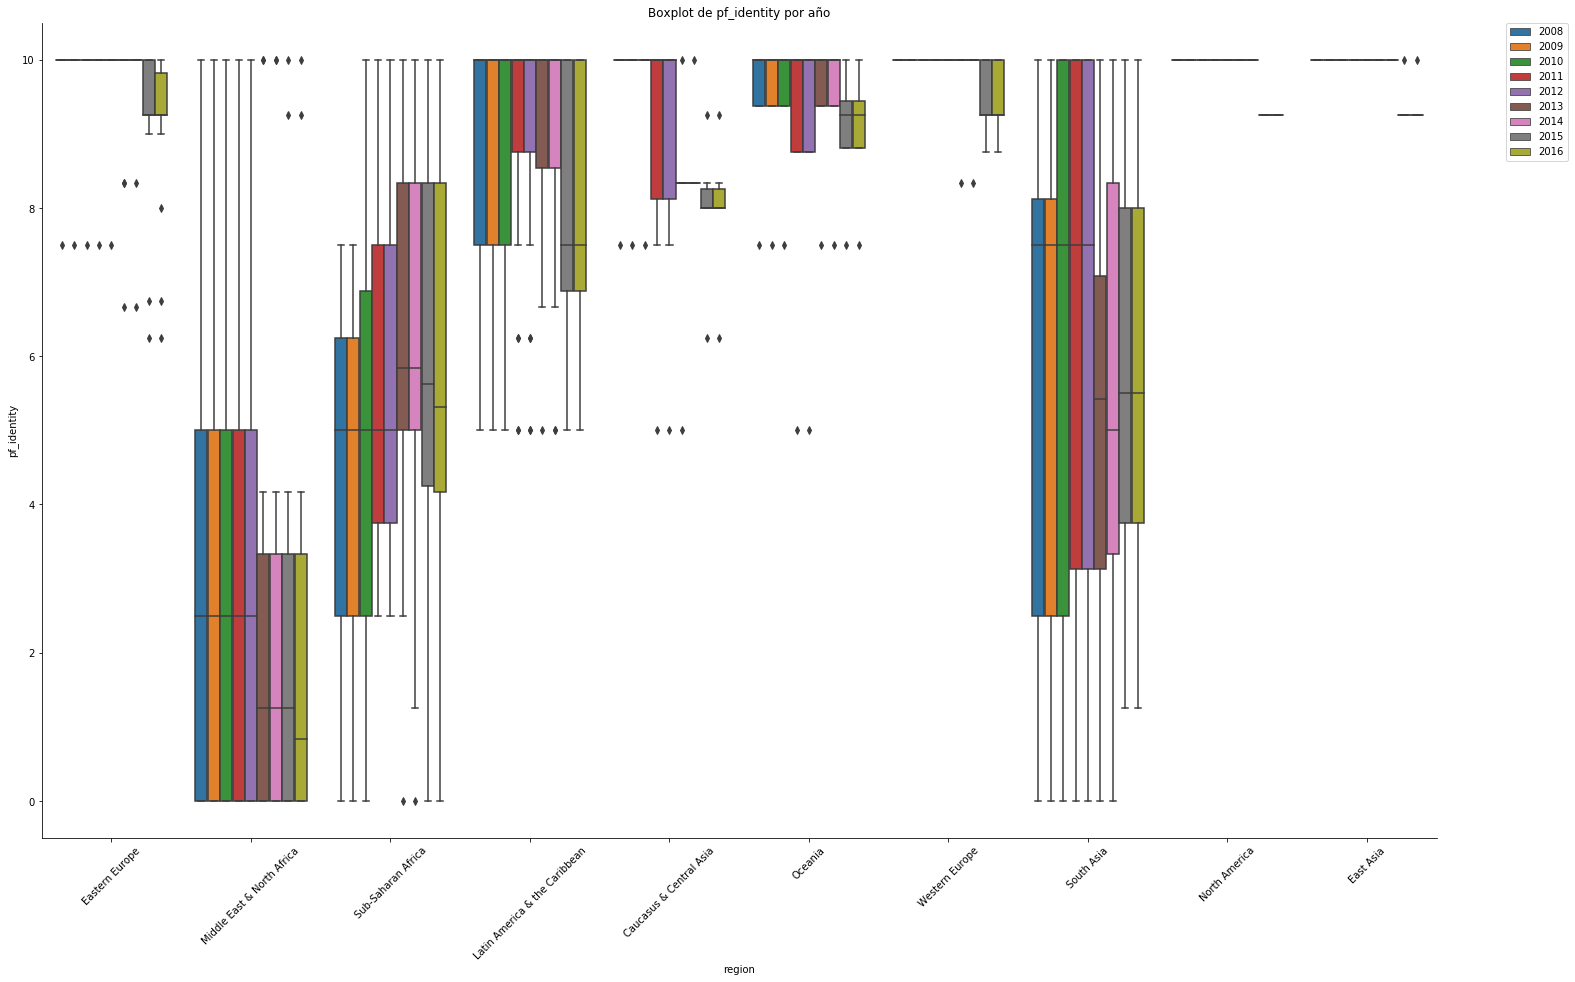

In [19]:
## detección de los outliers agrupando los datos por año y utilizando el gráfico de boxplot
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='pf_identity', hue = 'year')
seaborn.despine()
plt.xticks(rotation=45)
plt.title('Boxplot de pf_identity por año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

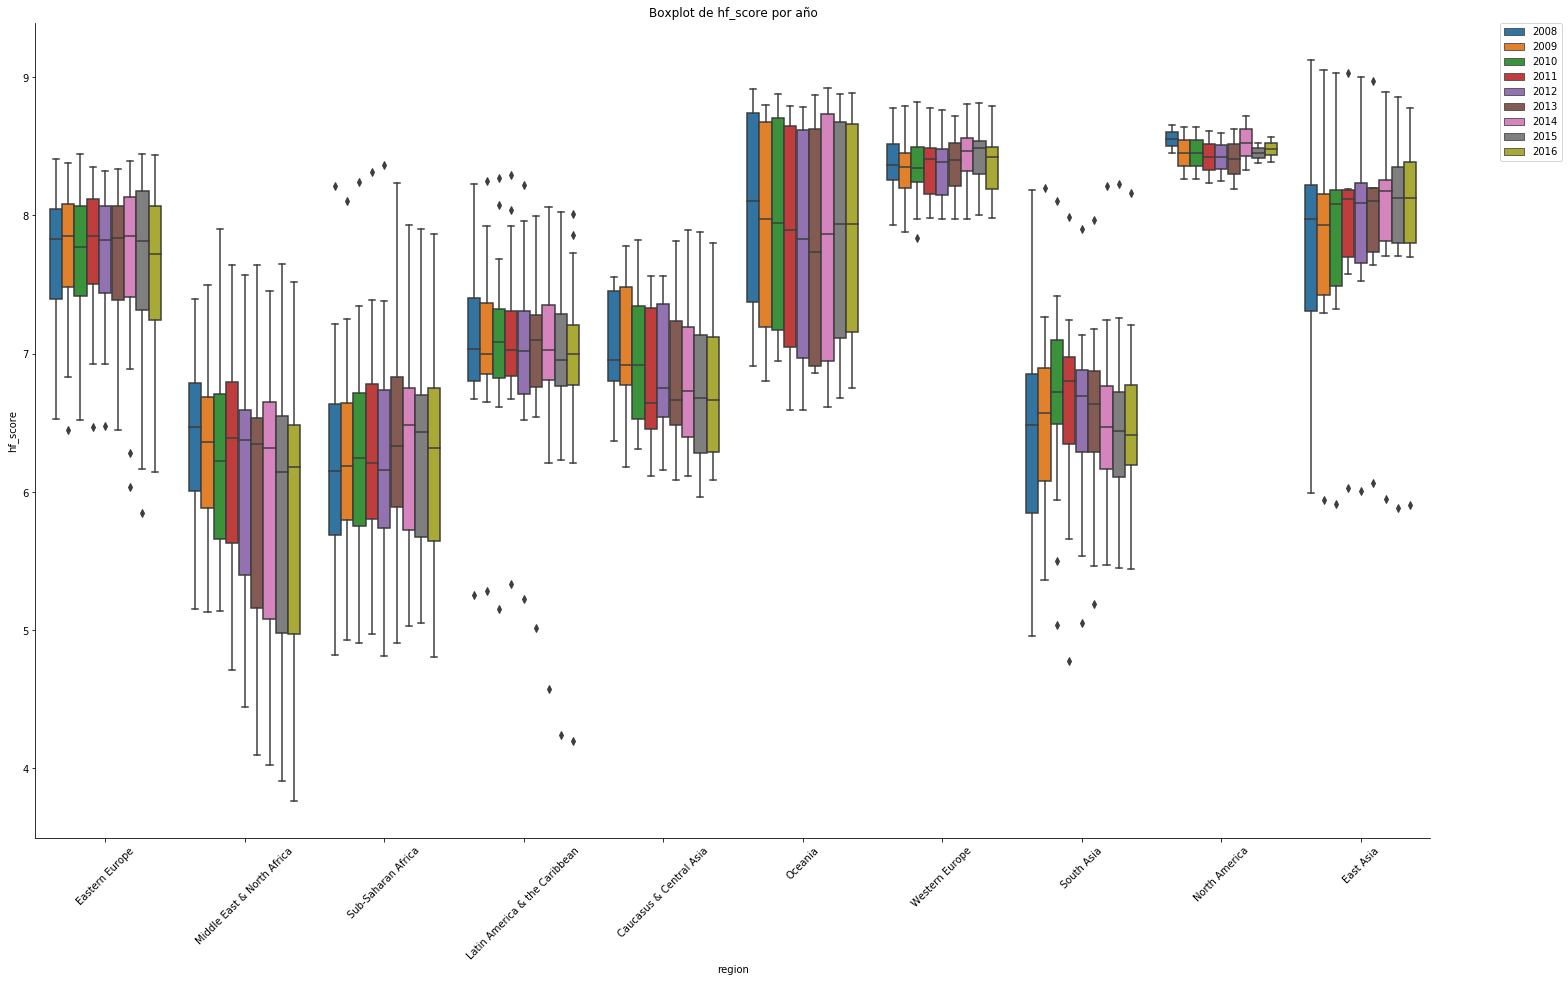

In [20]:
## detección de los outliers agrupando los datos por año y utilizando el gráfico de boxplot
plt.figure(figsize=(25,15))
seaborn.boxplot(data=dataset, x='region', y='hf_score', hue = 'year')
seaborn.despine()
plt.xticks(rotation=45)
plt.title('Boxplot de hf_score por año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5,1,'Boxplot de hf_score y pf_identity')

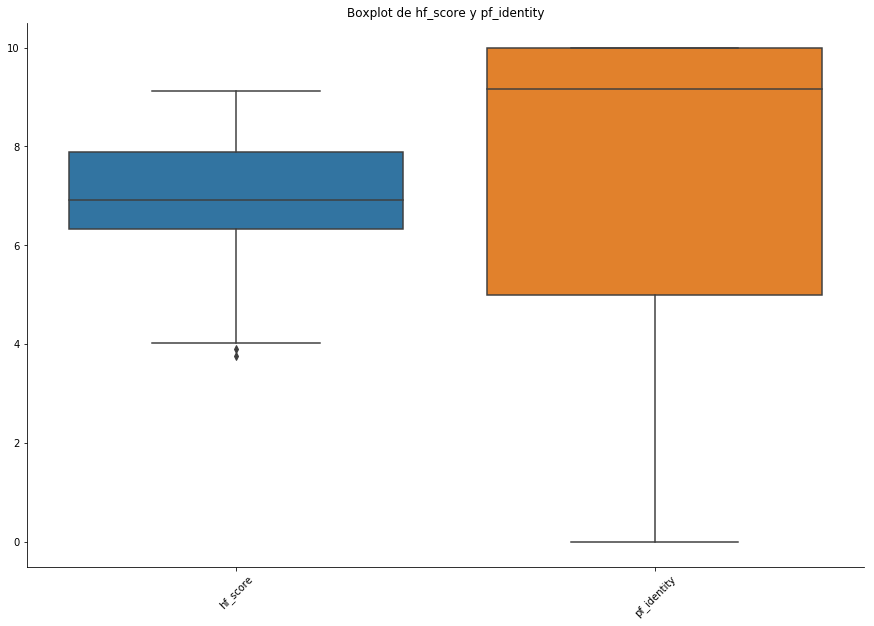

In [21]:
## detección de los outliers agrupando los datos por año y utilizando el gráfico de boxplot
plt.figure(figsize=(15,10))
seaborn.boxplot(data=dataset[['hf_score','pf_identity']])
seaborn.despine()
plt.xticks(rotation=45)
plt.title('Boxplot de hf_score y pf_identity')

No se puede eliminar los outliers de las muestras ya que no existen valores que escapen de manera significativa de la media muestral.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

<h3> Gráfico de media de la variable pf_identity a través de los años </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


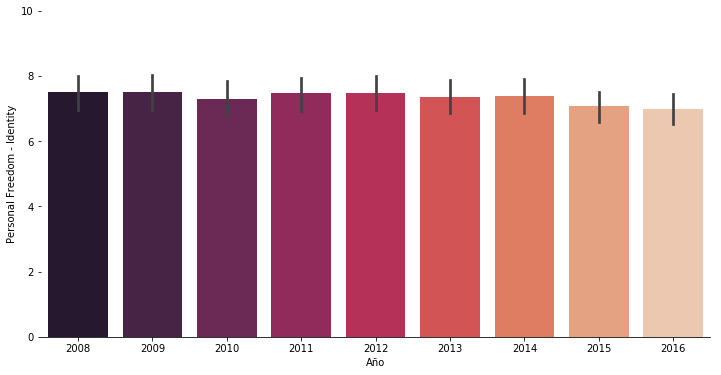

In [22]:
plt.figure(figsize=(12,6))
seaborn.barplot(data = mi_dataset, x='year', y='pf_identity', palette="rocket")
plt.xlabel('Año')
plt.ylabel('Personal Freedom - Identity')
plt.ylim(0, 10)
seaborn.despine(left=True)

<h3> Gráfico de media de la variable hf_score a través de los años </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


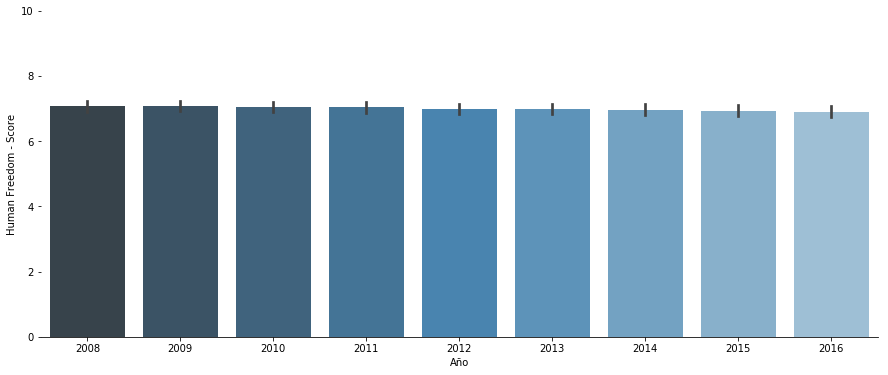

In [23]:
plt.figure(figsize=(15,6))
seaborn.barplot(data = mi_dataset, x='year', y='hf_score', palette="Blues_d")
plt.xlabel('Año')
plt.ylabel('Human Freedom - Score')
plt.ylim(0, 10)
seaborn.despine(left=True)

<h3> Gráfico de media de la variable pf_identity separando por regiones </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


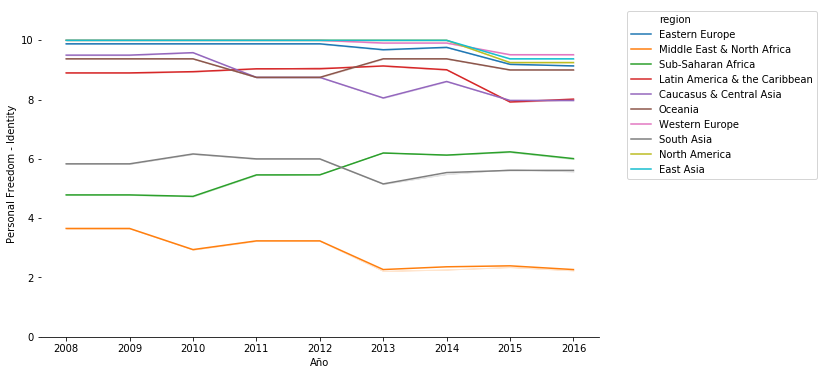

In [24]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data = dataset, x='year', y='pf_identity', hue = 'region', ci=0)
plt.xlabel('Año')
plt.ylabel('Personal Freedom - Identity')
plt.ylim(0, 11)
seaborn.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

<h3> Gráfico de media de la variable hf_score separando por regiones </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


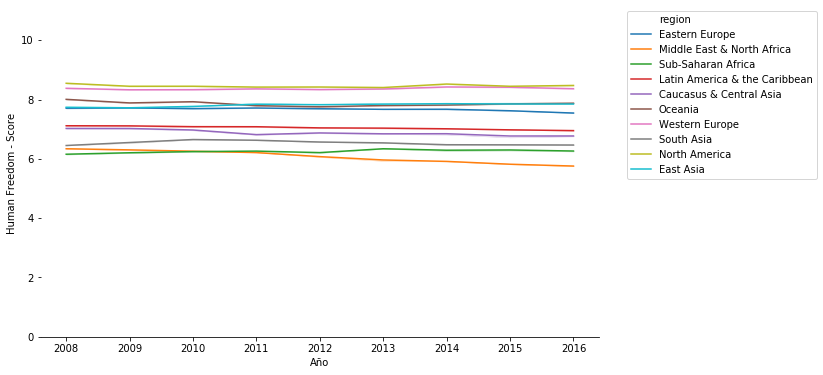

In [26]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data = dataset, x='year', y='hf_score', hue = 'region', ci=0)
plt.xlabel('Año')
plt.ylabel('Human Freedom - Score')
plt.ylim(0, 11)
seaborn.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

**Conclusión** Al dividir por regiones los datos de las variables pf_identity y hf_score se puede observar que los valores de media de ambas variables se mantienen en cierta medida constantes independientemente de la región, así como se pudo observar al calcular para todas los datos en conjunto

<h3> Tendencia de variables por países </h3>

A fin de seleccionar paises para el análisis de la tendencias de éstos, calculamos la desviación estándar de la variable *pf_identity* y posteriormente seleccionamos aquellos que difieran representativamente en su variación.

In [40]:
dataset_latino[['countries','pf_identity']].groupby('countries').std().sort_values(by=['pf_identity'])

,pf_identity
countries,
Argentina,0.000000
Bahamas,0.000000
Barbados,0.000000
Mexico,0.000000
Bolivia,0.000000
Uruguay,0.000000
Suriname,0.000000
Colombia,0.000000
Ecuador,0.000000


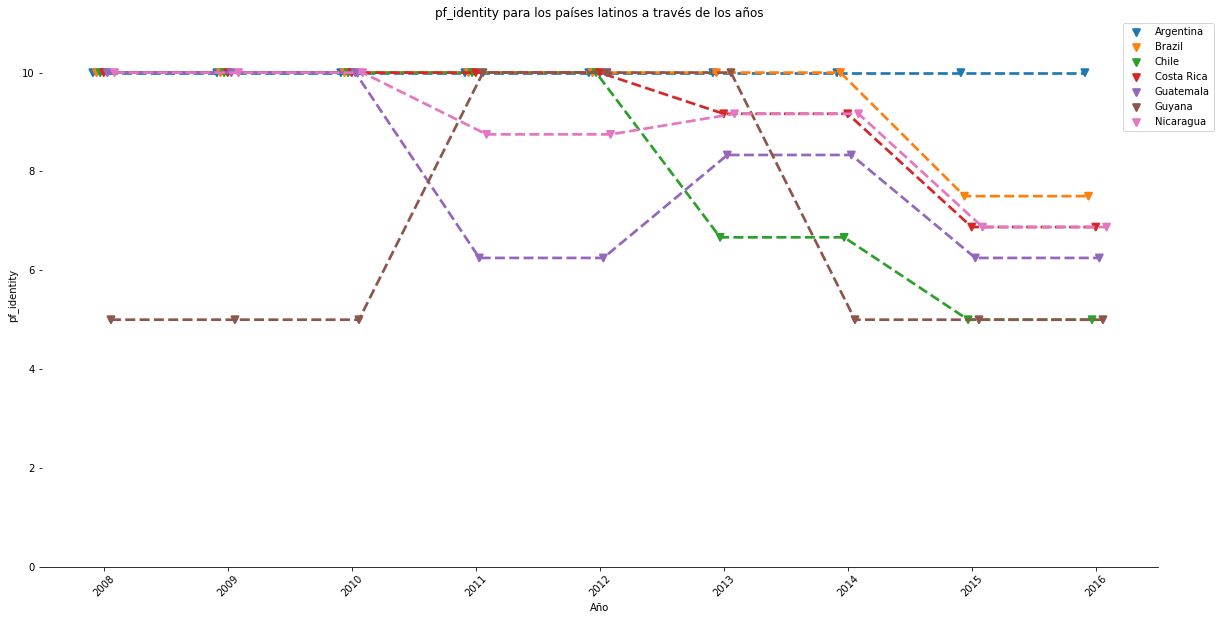

In [42]:
plt.figure(figsize=(20,10))
lista = ['Argentina','Brazil','Nicaragua','Costa Rica','Guatemala','Chile','Guyana']
seaborn.pointplot(data=dataset_latino[dataset_latino['countries'].isin(lista)],
                  x='year', y='pf_identity', dodge=True,
                  hue='countries', markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xticks(rotation=45);
plt.xlabel('Año')
plt.ylabel('pf_identity')
plt.title('pf_identity para los países latinos a través de los años')
plt.ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
seaborn.despine(left=True)

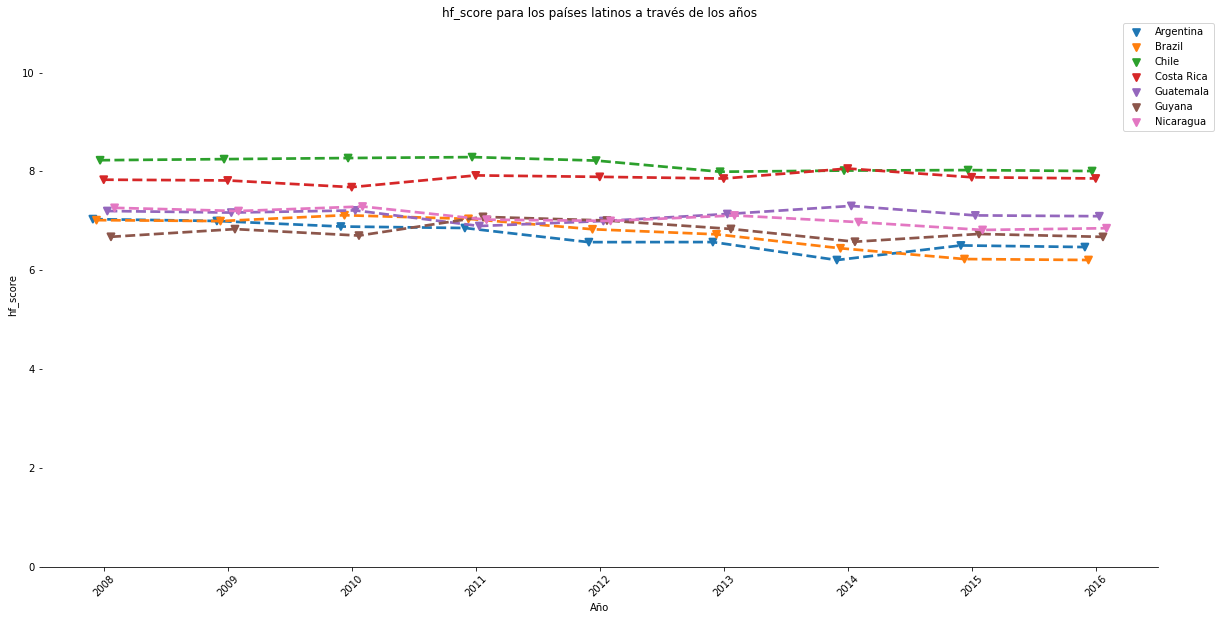

In [45]:
plt.figure(figsize=(20,10))
lista = ['Argentina','Brazil','Nicaragua','Costa Rica','Guatemala','Chile','Guyana']
seaborn.pointplot(data=dataset_latino[dataset_latino['countries'].isin(lista)],
                  x='year', y='hf_score', dodge=True,
                  hue='countries', markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xticks(rotation=45);
plt.xlabel('Año')
plt.ylabel('hf_score')
plt.ylim(0, 11)
plt.title('hf_score para los países latinos a través de los años')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
seaborn.despine(left=True)

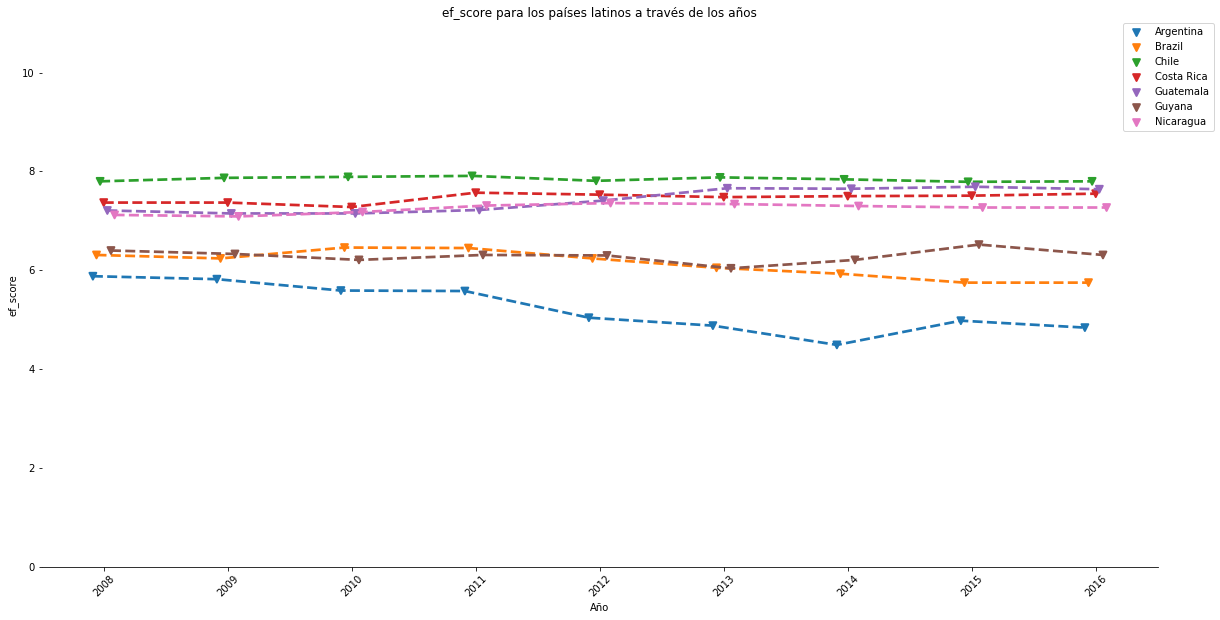

In [44]:
plt.figure(figsize=(20,10))
lista = ['Argentina','Brazil','Nicaragua','Costa Rica','Guatemala','Chile','Guyana']
seaborn.pointplot(data=dataset_latino[dataset_latino['countries'].isin(lista)],
                  x='year', y='ef_score', dodge=True,
                  hue='countries', markers='v', linestyles='--', errwidth=1, capsize=0.2)
plt.xticks(rotation=45);
plt.xlabel('Año')
plt.ylabel('ef_score')
plt.title('ef_score para los países latinos a través de los años')
plt.ylim(0, 11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
seaborn.despine(left=True)

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

<h3> Histograma de la distribución de la variable pf_identity</h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


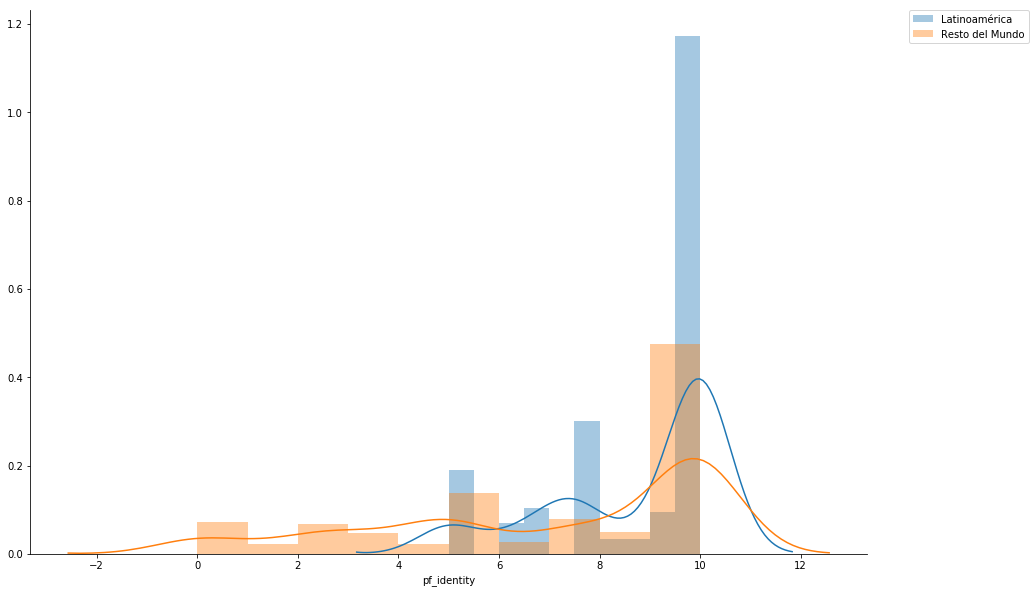

In [28]:
plt.figure(figsize=(15,10))
seaborn.distplot(dataset_latino['pf_identity'].dropna(),bins=10, label='Latinoamérica')
seaborn.distplot(dataset_resto['pf_identity'].dropna(),bins=10, label='Resto del Mundo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Para el caso de la variable *pf_identity*, las distribuciones tanto para latinoamérica como para el resto del mundo tienen características simétricas con una concentración de los valores alrededor del máximo del rango de la escala; de etodas formas la distribución no corresponde a una distribución normal.

<h3> Histograma de la distribución de la variable hf_score </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


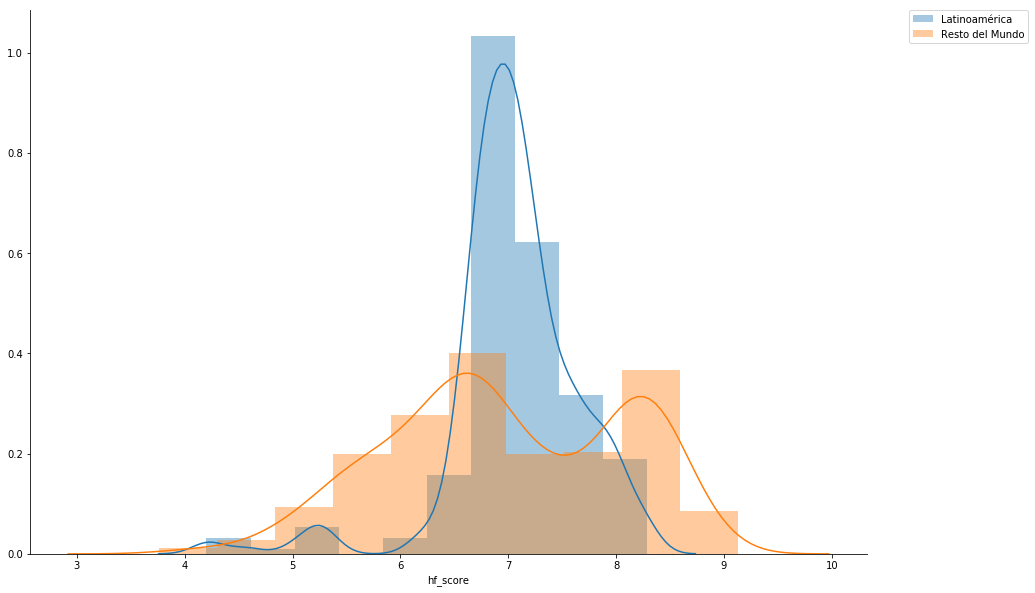

In [29]:
plt.figure(figsize=(15,10))
seaborn.distplot(dataset_latino['hf_score'].dropna(),bins=10, label='Latinoamérica')
seaborn.distplot(dataset_resto['hf_score'].dropna(),bins=10, label='Resto del Mundo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Para el caso de la variable *hf_score*, para la distribución que corresponde a los datos globales la primera impresión es de que existe una superposición de dos noramles, con máximos al rededor de los valores 6.7 y 8.2. 
Para el caso de latinoamérica la distribución es más normal con media en 7.1, pero con una leve asimetría hacia la izquiera de la misma.

En todos los casos tomamos todos los valores ya que estos se mantienen dentro del rango.

<h3> Test Kolmogorov-Smirnof </h3>

A los fines de realizar el test de kolmogorov_smirnof, primero debemos normalizar los datos a media=0 y desviación standard=1, para esto se efectuan las siguientes operaciones. Al test lo vamos a realizar tomando como origen los datos de Latinoamérica.

In [104]:
pf_media, pf_std = stats.norm.fit(dataset_latino['pf_identity'].dropna())
hf_media, hf_std = stats.norm.fit(dataset_latino['hf_score'].dropna())
pf_normal = (dataset_latino['pf_identity'].dropna() - pf_media) / pf_std
hf_normal = (dataset_latino['hf_score'].dropna() - hf_media) / hf_std

In [ ]:
kstest_pf = stats.kstest(numpy.array(pf_normal),'norm')
print ('KSTEST de la variable pf_identity: ', kstest_pf)

kstest_hf = stats.kstest(numpy.array(hf_normal),'norm')
print ('KSTEST de la variable hf_score: ', kstest_hf)

Con los valores p-value adquiridos no podemos confirmar que las distribuciones sean normales.

<h3> Gráficos QQ entre datos de latinoamérica y norm - Variable pf_identity </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


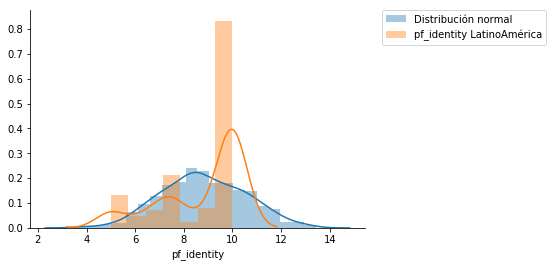

In [31]:
loc, scale = stats.norm.fit(dataset_latino['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset_latino['pf_identity'].dropna(), label='pf_identity LatinoAmérica')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


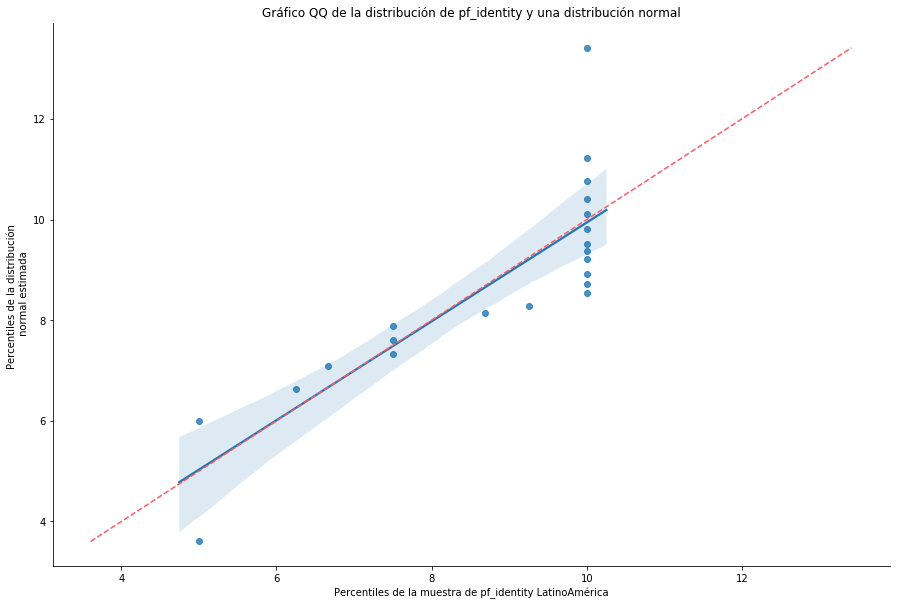

In [32]:
percs = numpy.linspace(0,100,21)
qn_sample = numpy.percentile(dataset_latino['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset_latino['pf_identity'].dropna())), percs)
plt.figure(figsize=(15,10))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity LatinoAmérica')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")
seaborn.despine()

<h3> Gráficos QQ entre datos de latinoamérica y norm - Variable hf_score </h3>

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


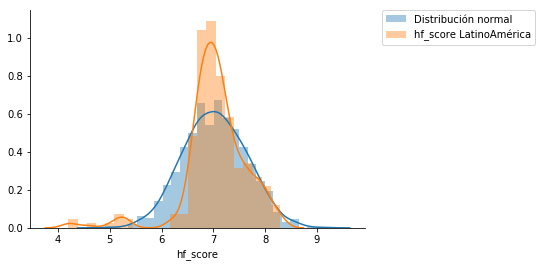

In [33]:
loc, scale = stats.norm.fit(dataset_latino['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset_latino['hf_score'].dropna(), label='hf_score LatinoAmérica')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


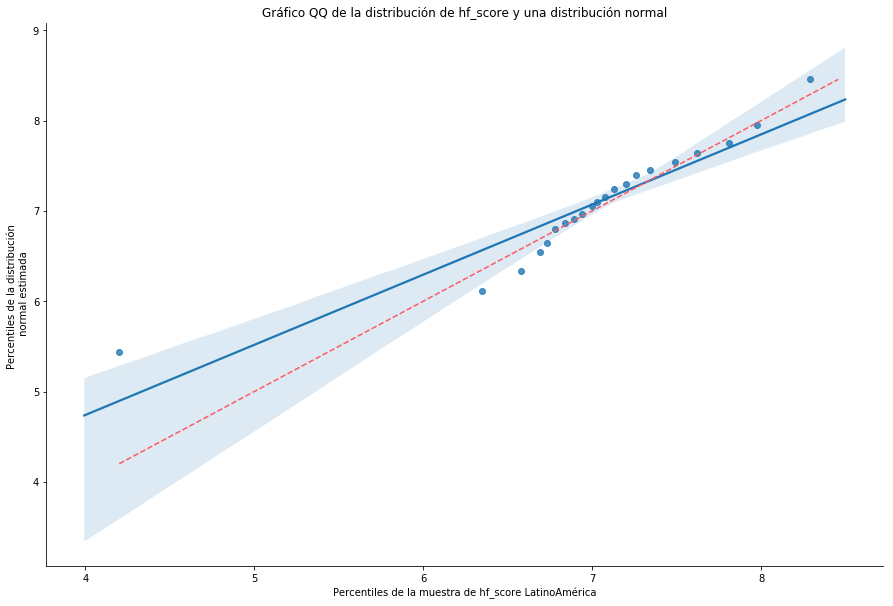

In [34]:
percs = numpy.linspace(0,100,21) 
qn_sample = numpy.percentile(dataset_latino['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset_latino['hf_score'].dropna())), percs)
plt.figure(figsize=(15,10))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score LatinoAmérica')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")
seaborn.despine()

<h3> Skew y Kurtosis </h3>

In [35]:
skew_pf = stats.skew (dataset_latino['pf_identity'].dropna())
skew_hf = stats.skew (dataset_latino['hf_score'].dropna())

print ('Skew de la variable pf_identity: ' , skew_pf)
print ('Skew de la variable hf_score: ' , skew_hf)

kurtosis_pf = stats.kurtosis(dataset_latino['pf_identity'].dropna())
kurtosis_hf = stats.kurtosis(dataset_latino['hf_score'].dropna())

print ('Curtosis de la variable pf_identity: ' , kurtosis_pf)
print ('Curtosis de la variable hf_score: ' , kurtosis_hf)

Skew de la variable pf_identity:  -1.0478440216224703
Skew de la variable hf_score:  -1.442092151332142
Curtosis de la variable pf_identity:  -0.2953048553672586
Curtosis de la variable hf_score:  5.340188962725749


Para ambas variables, la ocurrencia de un skew negativo nos demuestra que la cola de distribución se alarga sobre los valores inferiores a la media, así como se comprobó graficamente. Esto nos demuestra que dentro del rango de valores existe una mayor ocurrencia de aquellos en el extremo superior.

En cambio para el caso de la kurtosis, el valor de 5.34 en latinoamérica denota que existe una alta concentración de valores alrededor de la media.

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


<h3> Pairplot entre las variables pf_identity, hf_score y ef_score </h3>

<Figure size 2160x1440 with 0 Axes>

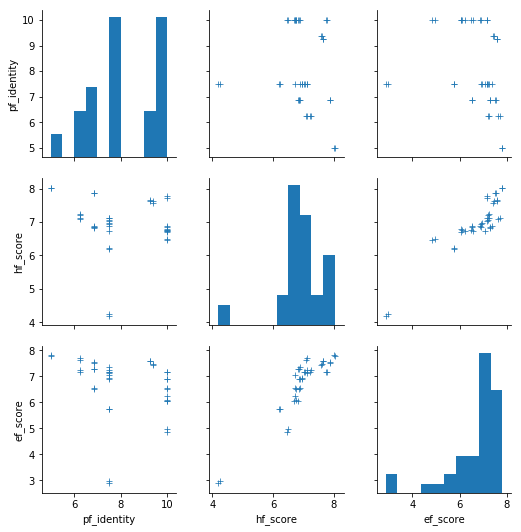

In [38]:
plt.figure(figsize=(30,20))
seaborn.pairplot(data=dataset_latino.dropna(), vars=['pf_identity', 'hf_score', 'ef_score'], markers='+')
seaborn.despine()

A simple viste en el gráfico podemos afirmar que existe correlación positiva entre las variables bajo análisis.

<h3> Correlación entre pf_identity y hf_score </h3>

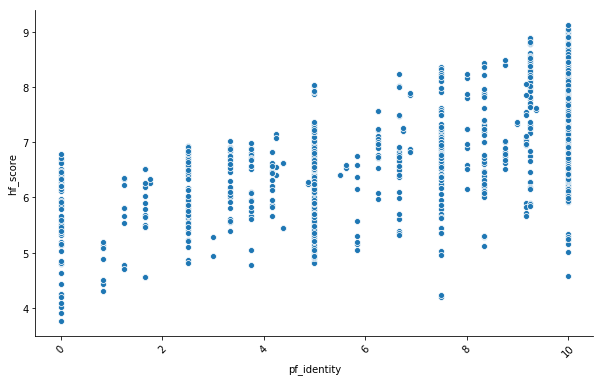

In [50]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset,
                    x='pf_identity',
                    y='hf_score')
plt.xticks(rotation=45)
seaborn.despine()

<h3> Correlación entre pf_identity y ef_score </h3>

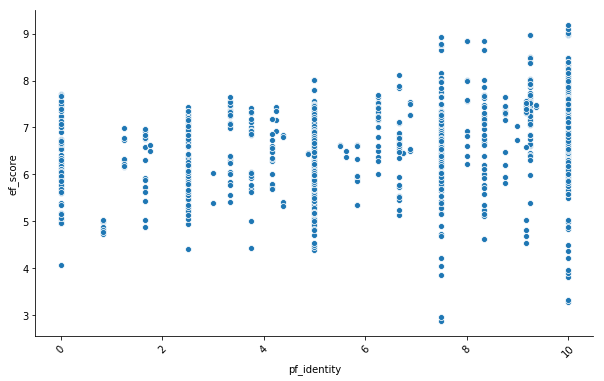

In [49]:
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=dataset,
                    x='pf_identity',
                    y='ef_score')
plt.xticks(rotation=45)
seaborn.despine()

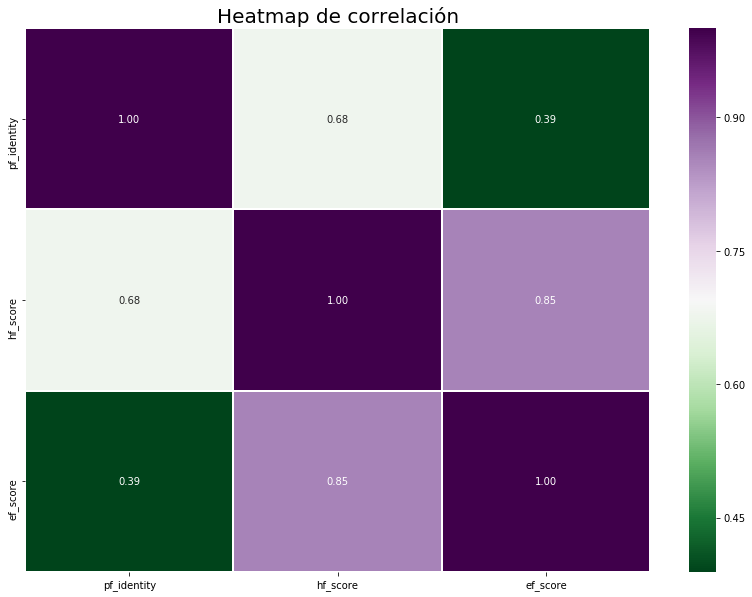

In [80]:
plt.figure(figsize=(14,10))
plt.title("Heatmap de correlación",fontsize=20)
seaborn.heatmap(data=dataset[['pf_identity','hf_score','ef_score']].corr(),cmap="PRGn_r",annot=True, fmt='.2f', linewidths=1)
plt.show()

Se puede concluir que existe entre las variables bajo análisis una correlación positiva entre las mismas.

<h3> Covarianza y coeficientes de correlación </h3>

In [46]:
cov_pf = numpy.cov(dataset['pf_identity'].dropna(), dataset['hf_score'].dropna())[0][1]
print ('Covarianza entre pf_identity y hf_score: ', cov_pf )

Covarianza entre pf_identity y hf_score:  2.1966164733462246


In [48]:
cov_ef = numpy.cov(dataset['pf_identity'].dropna(), dataset['ef_score'].dropna())[0][1]
print ('Covarianza entre pf_identity y ef_score: ', cov_ef )

Covarianza entre pf_identity y ef_score:  1.0856334099430547


In [54]:
pearson_pf = dataset.corr(method="pearson")["pf_identity"]["hf_score"]
print ('Pearson  entre pf_identity y hf_score: ', pearson_pf )

Pearson  entre pf_identity y hf_score:  0.6777541950437723


In [56]:
pearson_ef = dataset.corr(method="pearson")["pf_identity"]["ef_score"]
print ('Pearson  entre pf_identity y ef_score: ', pearson_ef )

Pearson  entre pf_identity y ef_score:  0.3888772379714594


Los coeficientes calculados anteriores  denotan que entre ambos pares de variables existe una correlación positiva 

<h1> Conclusiones </h1>

<h3> ¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de identidad? </h3>

A los fines de obtener las últimas conclusiones, se calcula la media de las libertades de identidad (variable pf_identity)

In [79]:
pf_identity_region = dataset.groupby('region').mean()['pf_identity']
pf_identity_region = pf_identity_region.sort_values()
pf_identity_region

region
Middle East & North Africa       2.830000
Sub-Saharan Africa               5.567050
South Asia                       5.735294
Caucasus & Central Asia          8.714744
Latin America & the Caribbean    8.765086
Oceania                          9.152778
Eastern Europe                   9.683333
North America                    9.833333
East Asia                        9.861111
Western Europe                   9.871399
Name: pf_identity, dtype: float64

Gráficamente

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


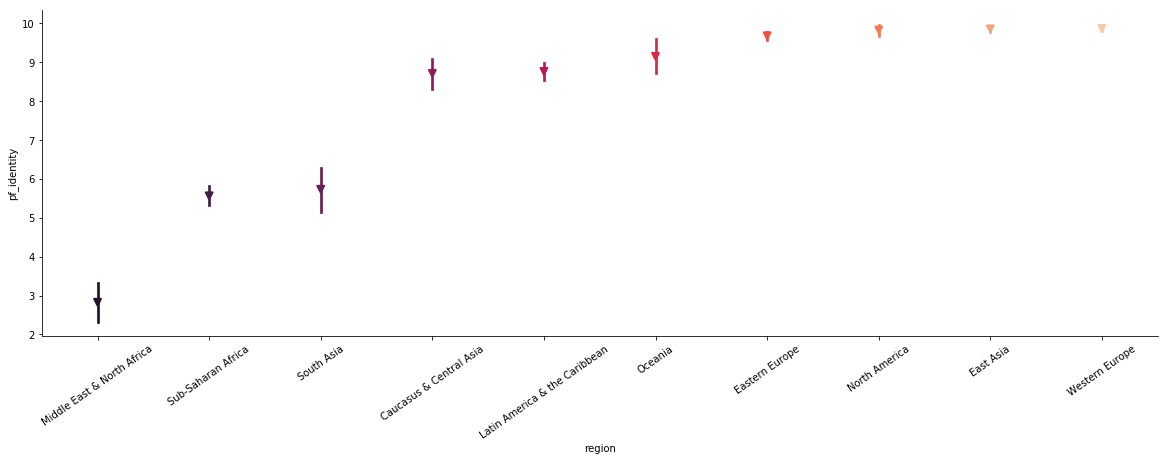

In [78]:
plt.figure(figsize=(20,6))
seaborn.pointplot(data=dataset,
                  x='region', y='pf_identity',
                  order=pf_identity_region.index, markers='v', palette="rocket")
plt.xticks(rotation=35)
seaborn.despine()


Con este análisis se puede concluir que Latinoámerica se encuentra dentro de los valores medianos de la libertad personal, por lo tanto esto indica que existe una buena libertad personal pero en comparación con el resto del mundo existe mucho por mejorar.

<h2> 1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo. </h2>

Para contestar esta pregunta primero observamos que el rango de Nivel de Libertad de Identidad cada país (*pf_identity*) va de 0 a 10; Por lo que en principio podemos encontrar que el valor 4.5 es un valor intermedio, esto que da como impresión inicial que es un país con problemas en este sentido. 
Podemos entonces comparar este valor con los valores ofrecidos por el dataset de otros países y/o continentes donde tenemos cierta certeza de los niveles de libertad de identidad que poseen, podemos tener estos conocimientos por experiencia propia del día a día y/o por estar informado sobre la historia, noticias y situación de los países mundiales.

Según este dataset el valor de Nivel de Libertad de Identidad (*pf_identity*) en Argentina es el valor máximo (10.0) esto puede resultar un poco discutible a simple vista para una persona local ya que sabemos que en Argentina todavía tenemos serios problemas con la aceptación social de personas con orientaciones sexuales hacia el mismo sexo, sin embargo, si analizamos los valores que componen este *pf_identity*, efectivamente vemos que analiza esta variable desde un punto de vista legal y tiene en cuenta la libertad real que una persona tiene para llevar a cabo diversos trámites como cambio de identidad, casamiento, divorcio, etc. Teniendo en cuenta ese aspecto estamos de acuerdo con el valor mostrado ya que, según nuestro modo de ver las cosas, refleja realmente lo que sucede en nuestro país en este momento en ese aspecto. 

Observamos que en Latinoamérica en general se mantiene esta tendencia de Argentina y aunque algunos países tengan un valor menor generalmente encontramos valores por encima de 7-8 en todos los países latinoamericanos, lo que es análogo a lo que conocemos en el día a día sobre nuestro continente. Lo mismo comprobamos a escala mundial, países de Oriente Medio como Irán, Pakistán (3.0 y 3.75 respectivamente) tienen valores muy bajos, sabemos que estos países tienen fuerte influencia de su religión que es muy cerrada y esto se refleja en estos números. Por otro lado tenemos países como los del continente europeo siendo el caso de Francia y Alemania (10.0 y 10.0 respectivamente), podemos observar como era esperable que estos países tengan valores máximos de libertad de identidad. Números mas variados se encuntran en el continente africano y asiático y esto es debido a la diversidad de culturas y contrastes que encontramos en estos continentes. Por ejemplo Sudáfrica (9.25) y Botsuana (4.25) a pesar de ser países que limitan entre sí.

Con este último valor (*Botsuana: 4.25*) encontramos un caso similar al que nos pide la consigna (cercano a 4.5). Mediante una rápida investigación supimos que este país reconoció por ley la identidad de género de una persona trans recién en 2017, un año después de hacerse esta encuesta, este país tampoco permite casamiento entre dos personas del mismo sexo. De este modo podemos hacernos una idea de que representa el valor pedido.

<h2> 2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando? </h2>

El siguiente gráfico muestra la evolución del valor *pf_identity* de Latinoamérica y el Caribe en 10 años (hasta 2016):

Text(0, 0.5, 'Valores')

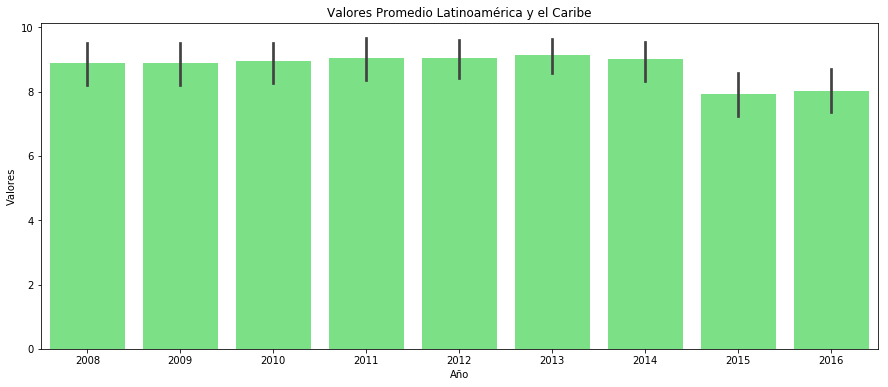

In [12]:
plt.figure(figsize=(15,6))
dataset_latino = dataset[dataset['region'] == 'Latin America & the Caribbean']
seaborn.barplot(data=dataset_latino, x='year', y='pf_identity', color=GREEN)
plt.title('Valores Promedio Latinoamérica y el Caribe')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver claramente que en los últimos dos años hubo un retroceso en este ítem y este retroceso tambièn se puede ver a nivel mundial en el siguiente gráfico:

Text(0, 0.5, 'Valores')

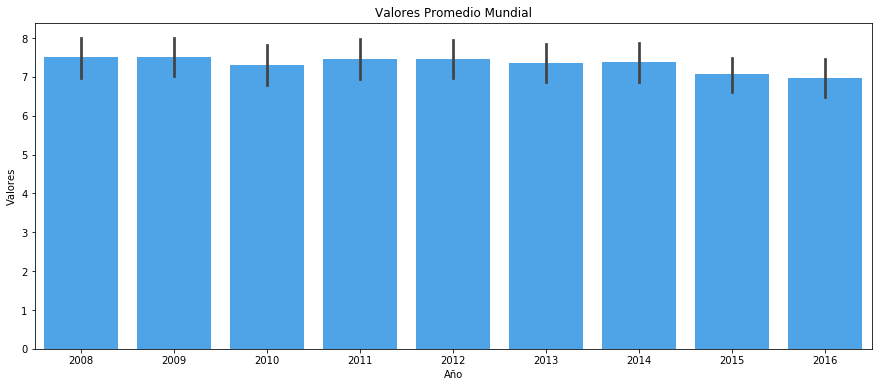

In [13]:
plt.figure(figsize=(15,6))
seaborn.barplot(data=dataset, x='year', y='pf_identity', color=BLUE)
plt.title('Valores Promedio Mundial')
plt.xlabel('Año')
plt.ylabel('Valores')

Mientras que en el caso de Argentina el valor se ha mantenido constante como máximo (10.0) a través de los años mostrados en el dataset.

<h2> 3. En este estudio, la libertad se mide con dos estimadores principales: hf_score que hace referencia a Human Freedom, y ef_score que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad? </h2>

Graficaremos los valores mundiales de *pf_identity* (azul), *hf_score* (naranja) y *hf_score* (verde).

Text(0, 0.5, 'Valores')

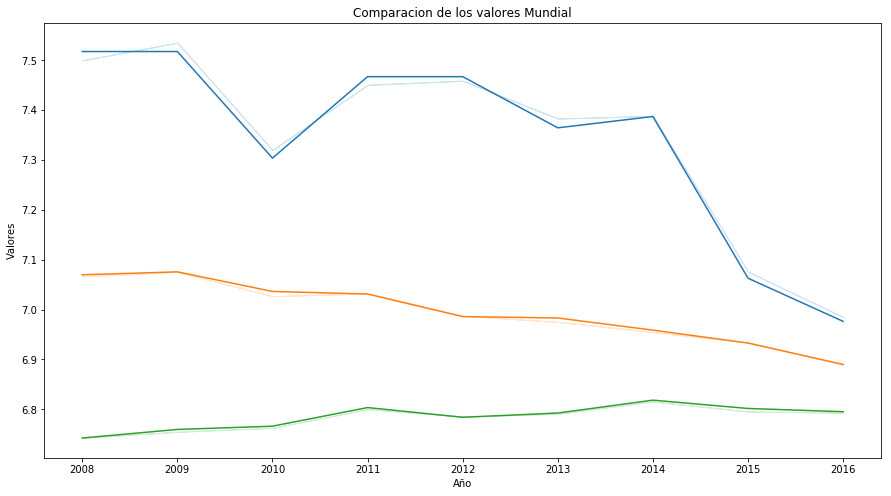

In [46]:
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset, x='year', y='ef_score', ci=0)
plt.title('Comparacion de los valores Mundial')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver que hay una tendencia en caída a nivel mundial de los valores *pf_identity* y *hf_score* lo que nos hace intuir que hay alguna dependencia entre ellos, sin embargo mirando este gráfico vemos que *ef_score*  no sigue la tendencia lo que nos da una primera impresión de que es independiente de las otras dos, sin embargo para sacarnos las duda ya que no estamos seguros de ello, analizaremos algunos continentes por separado para de este modo tratar de identificar algún patrón.

El siguiente gráfico es la comparación de los valores en Latinoamérica y el Caribe:

Text(0, 0.5, 'Valores')

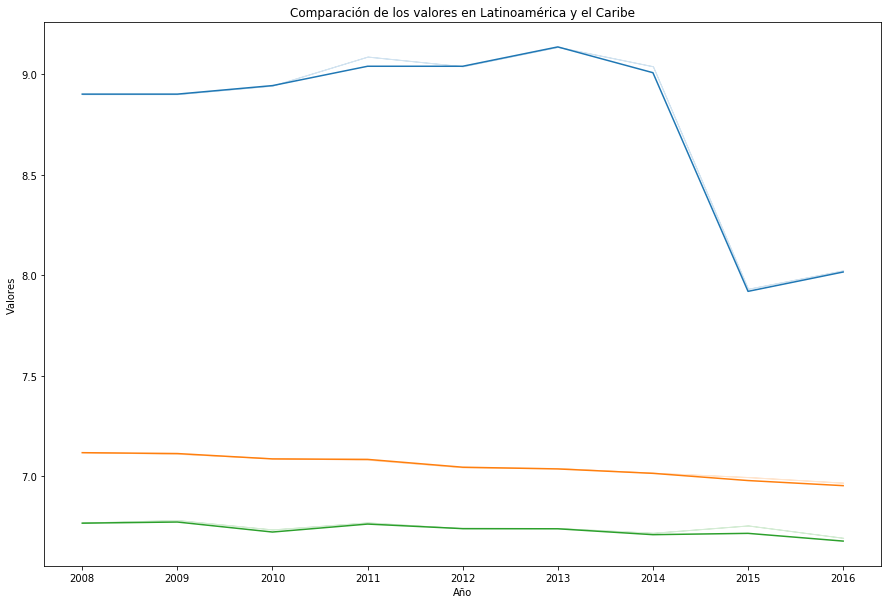

In [35]:
dataset_latino = dataset[dataset['region'] == 'Latin America & the Caribbean']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_latino, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_latino, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_latino, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en Latinoamérica y el Caribe')
plt.xlabel('Año')
plt.ylabel('Valores')

En este caso si vemos una cierta tendencia general negativa. Claramente vemos que en este continente los factores económicos y humanos afectan negativamente en el índice de libertad de identidad.

Analicemos otro continente como Europa.

Text(0, 0.5, 'Valores')

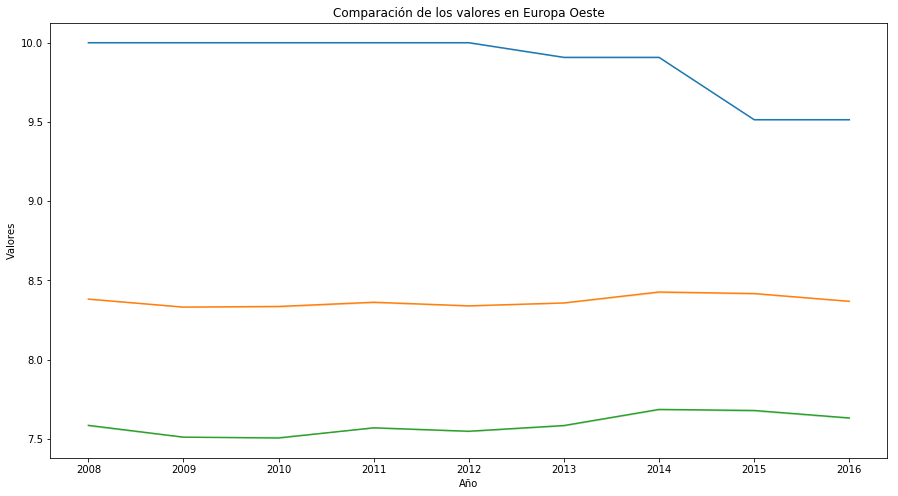

In [43]:
dataset_Europa = dataset[dataset['region'] == 'Western Europe']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_Europa, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_Europa, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_Europa, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en Europa Oeste')
plt.xlabel('Año')
plt.ylabel('Valores')

En este caso es curioso ya que vemos que a pesar de que las condiciones sociales y económicas del continente se mantienen casi constantes hubo una gran pérdida en el índice libertad de identidad.

Por último analizaremos el Sur Asiático:

Text(0, 0.5, 'Valores')

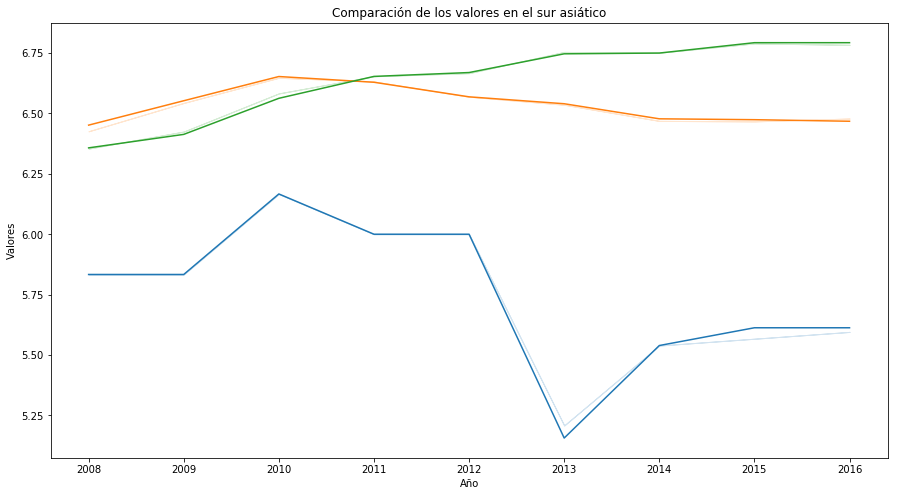

In [44]:
dataset_asia = dataset[dataset['region'] == 'South Asia']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_asia, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_asia, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_asia, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en el sur asiático')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver en este caso que el factor económico no influye para nada en las variaciones del índice de libertad de identidad, en cambio, sí encontramos a simple vista una relación con el índice de libertad humana.

Podríamos seguir analizando muchos mas continentes sin embargo hay algo que está claro y es que en algunos sectores del mundo hay una dependencia entre algunos o todos estos factores, como el caso de Latinoamérica, y en otros no hay una dependencia (o por lo menos no es tan fuerte) como el caso de Europa. Por lo que creemos estar en condiciones de afirmar que aunque estos valores siempre estén relacionados entre sí, hay países donde esta dependencia es mas fuerte y otros donde es casi nula y en esos casos influyen mas fuertemente otros factores.